#  <center> 第一部分 简单介绍R</center >

# 2 创建数据集 
## 2.2 数据结构(data structures)
1. 向量、矩阵、数组 
  - 向量：1维 c(...)  
    + Creating vectors

    ```R
    > a <- c(1, 2, 5, 3, 6, -2, 4)
    > a
    [1]  1  2  5  3  6 -2  4
    > b <- c("one", "two", "three")
    > b
    [1] "one"   "two"   "three"
    > c <- c(TRUE, TRUE, TRUE, FALSE, TRUE, FALSE)
    > c
    [1]  TRUE  TRUE  TRUE FALSE  TRUE FALSE
    ```
    + Using vector subscripts

    ```R
    > a <- c(1, 2, 5, 3, 6, -2, 4)
    > a[3]
    [1] 5
    > a[c(1, 3, 5)]
    [1] 1 5 6
    > a[2:6]
    [1]  2  5  3  6 -2                     

    > a <- c("k", "j", "h", "a", "c", "m")
    > a[3]
    [1] "h"
    > a[c(1, 3, 5)]
    [1] "k" "h" "c"
    > a[2:6]
    [1] "j" "h" "a" "c" "m"
    ```
  - 矩阵：2维——> A  matrix  is  a  two-dimensional  array  in  which  each  element  has  the  ___same___  mode (numeric, character, or logical).
 ```R
 matrix(vector, nrow=number_of_rows, ncol=number_of_columns,
                    byrow=logical_value, 
                    dimnames=list(char_vector_rownames, char_vector_colnames))```
    - Listing 2.1 - Creating Matrices

    ```R
    > y <- matrix(1:20, nrow=5, ncol=4)
    > y
         [,1] [,2] [,3] [,4]
    [1,]    1    6   11   16
    [2,]    2    7   12   17
    [3,]    3    8   13   18
    [4,]    4    9   14   19
    [5,]    5   10   15   20
    > 
    > cells    <- c(1,26,24,68)
    > rnames   <- c("R1", "R2")
    > cnames   <- c("C1", "C2") 
    > mymatrix <- matrix(cells, nrow=2, ncol=2, byrow=TRUE,
    +                    dimnames=list(rnames, cnames)) 
    > mymatrix
       C1 C2
    R1  1 26
    R2 24 68
    > 
    > mymatrix <- matrix(cells, nrow=2, ncol=2, byrow=FALSE,
    +                    dimnames=list(rnames, cnames))
    > mymatrix
       C1 C2
    R1  1 24
    R2 26 68
    ```
    - Listing 2.2 - Using matrix subscripts

    ```R
    > x <- matrix(1:10, nrow=2)
    > x
         [,1] [,2] [,3] [,4] [,5]
    [1,]    1    3    5    7    9
    [2,]    2    4    6    8   10
    > x[2,]
    [1]  2  4  6  8 10
    > x[,2]
    [1] 3 4
    > x[1,4]
    [1] 7
    > x[1, c(4,5)]
    [1] 7 9```
 - 数组：任意维 
 ```R
 array(vector, dimensions, dimnames)```
    - Listing 2.3 - Creating an array
    
    ```R
    > dim1 <- c("A1", "A2")
    > dim2 <- c("B1", "B2", "B3")
    > dim3 <- c("C1", "C2", "C3", "C4")
    > z <- array(1:24, c(2,3,4), dimnames=list(dim1, dim2, dim3))
    > z
    , , C1

       B1 B2 B3
    A1  1  3  5
    A2  2  4  6

    , , C2

       B1 B2 B3
    A1  7  9 11
    A2  8 10 12

    , , C3

       B1 B2 B3
    A1 13 15 17
    A2 14 16 18

    , , C4

       B1 B2 B3
    A1 19 21 23
    A2 20 22 24```

2. 数据框(dataframe) 一般也是2维，由不同___vector___组合。A data frame is more general than a matrix in that different columns can contain ___different___ modes of data (numeric, character, and so on).  
```R
 data.frame(col1, col2, col3,...)```
   - Listing 2.4 - Creating a dataframe
    
    ```R
    > patientID <- c(1, 2, 3, 4)
    > age <- c(25, 34, 28, 52)
    > diabetes <- c("Type1", "Type2", "Type1", "Type1")
    > status <- c("Poor", "Improved", "Excellent", "Poor")
    > patientdata <- data.frame(patientID, age, diabetes, status)
    > patientdata
      patientID age diabetes    status
    1         1  25    Type1      Poor
    2         2  34    Type2  Improved
    3         3  28    Type1 Excellent
    4         4  52    Type1      Poor```
   - Listing 2.5 - Specifying elements of a dataframe

    ```R
    > patientdata[1:2] # 注意，此处的 "1:2"指列号
      patientID age
    1         1  25
    2         2  34
    3         3  28
    4         4  52
    > patientdata[c("diabetes","status")]
      diabetes    status
    1    Type1      Poor
    2    Type2  Improved
    3    Type1 Excellent
    4    Type1      Poor
    ```
   
   - __attach，detach，and with__
    - attach：The _attach()_ function adds the data frame to the R search path.
    - 注意：The limitations with this approach are evident when more than one object can have the same name.
       ```R
       > mpg <- c(25, 36, 47)
       > attach(mtcars)
       The following object(s) are masked _by_ '.GlobalEnv':  mpg # 因为冲突，实际并没有加载数据
       > plot(mpg, wt)
       Error in xy.coords(x, y, xlabel, ylabel, log) : 
         'x' and 'y' lengths differ
       > mpg
       [1] 25 36 47```
    - detach: The _detach()_ function  removes  the  data  frame  from  the  search  path.
     ```R
      attach(mtcars)
      summary(mpg)
      plot(mpg, disp)
      plot(mpg, wt)
      detach(mtcars)```
    - with: 对于制定数据运行相关命令。对于上述由于名称冲突的情况，可以使用_with()_函数
     ```R
     > with(mtcars,{
                  print(summary(mpg))
                  plot(mpg, disp)
                  plot(mpg, wt)
                  })
      Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      10.40   15.43   19.20   20.09   22.80   33.90 ```
      - 注意：The limitation of the with() function is that assignments exist only within the function brackets.
       ```R
       > with(mtcars, {
         stats <- summary(mpg)
         stats
         })
       Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
       10.40   15.43   19.20   20.09   22.80   33.90 
       > stats
       Error: object 'stats' not found```
    - If you need to create objects that will exist outside of the with() construct, use the special assignment operator " __<<-__ " instead of the standard one (" __<-__ "). It saves the object to the global environment outside of the with() call.
       ```R
       > with(mtcars, {
                       nokeepstats <- summary(mpg)
                       keepstats <<- summary(mpg)
                       })
       > nokeepstats
       Error: object 'nokeepstats' not found
       > keepstats
       Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
       10.40   15.43   19.20   20.09   22.80   33.90
       ...<plot>...```
  - __Case Identifiers__
    - In the patient data example, ___patientID___ is used to identify individuals in the dataset. In R, case identifiers can be specified with a ___rowname___ option in the data-frame function.
     ```R
     > patientID <- c(1, 2, 3, 4)
     > age <- c(25, 34, 28, 52)
     > diabetes <- c("Type1", "Type2", "Type1", "Type1")
     > status <- c("Poor", "Improved", "Excellent", "Poor0")
     > patientdata <- data.frame(patientID, age, diabetes, 
                          status, row.names=status) # 注意，作为 row.names 的columns值不能有重复值
     > patientdata
               patientID age diabetes    status
    Poor              1  25    Type1      Poor
    Improved          2  34    Type2  Improved
    Excellent         3  28    Type1 Excellent
    Poor0             4  52    Type1     Poor0```

3. 因子（factor），一般包括 nomial(名义型仅用于区分类别category)、ordinal(有序型表示顺序)
 - for vectors representing ___nomial___ variables: 
 ```R
  diabetes  <-  factor(c("Type1", "Type2", "Type1", "Type1"))
 ```
 - for vectors representing ___ordinal___ variables, you add the parameter ___ordered=TRUE___ to the ___factor()___ function.  By default, factor levels for character vectors are created in alphabetical order.  You can override the default by specifying a levels option(Any data values not in the list will be set to missing.). 
 ```R
 status <- c("Poor", "Improved", "Excellent", "Poor")
 status <- factor(status, ordered=TRUE) # in alphabetical order: 1 = Excellent, 2 = Improved, 3 = Poor
 status <- factor(status, order=TRUE, 
           levels=c("Poor", "Improved", "Excellent")) # specifying a levels: 1 = Poor, 2 = Improved, 3 = Excellent
 ```
   -  Numeric variables can be coded as factors using the levels and labels options. 
   ```R
   > sex <- c(1,2,3,2,1)
   > sex <- factor(sex, levels=c(1, 2), labels=c("Male", "Female"))
   > sex
   [1] Male   Female <NA>   Female Male  
   Levels: Male Female
   ```
   - Listing 2.6 - Using factors
   ```R
    > patientID <- c(1, 2, 3, 4)
    > age <- c(25, 34, 28, 52)
    > diabetes <- c("Type1", "Type2", "Type1", "Type1")
    > status <- c("Poor", "Improved", "Excellent", "Poor")
    > diabetes <- factor(diabetes)
    > status <- factor(status, order=TRUE)
    > patientdata <- data.frame(patientID, age, diabetes, status)
    > str(patientdata)                               
    'data.frame':   4 obs. of  4 variables:
       patientID: num  1 2 3 4
       age      : num  25 34 28 52
       diabetes : Factor w/ 2 levels "Type1","Type2": 1 2 1 1
       status   : Ord.factor w/ 3 levels "Excellent"<"Improved"<..: 3 2 1 3
    > summary(patientdata)
       patientID         age         diabetes       status 
     Min.   :1.00   Min.   :25.00   Type1:3   Excellent:1  
     1st Qu.:1.75   1st Qu.:27.25   Type2:1   Improved :1  
     Median :2.50   Median :31.00             Poor     :2  
     Mean   :2.50   Mean   :34.75                          
     3rd Qu.:3.25   3rd Qu.:38.50 ```

4. 列表（列表中的元素可以是向量、矩阵、数组、数据框、列表）
 - Listing 2.7 - Creating a list
```R
    > g <- "My First List"
    > h <- c(25, 26, 18, 39)
    > j <- matrix(1:10, nrow=5)
    > k <- c("one", "two", "three")
    > mylist <- list(title=g, ages=h, j, k)
    > mylist
    $title
    [1] "My First List"

    $ages
    [1] 25 26 18 39

    [[3]]
         [,1] [,2]
    [1,]    1    6
    [2,]    2    7
    [3,]    3    8
    [4,]    4    9
    [5,]    5   10

    [[4]]
    [1] "one"   "two"   "three"
```



## 2.3 Data Input
1. Entering data interactively from the keyboard
```R
    mydata <- data.frame(age=numeric(0),
                         gender=character(0), weight=numeric(0))
    mydata <- edit(mydata)
```

  * Entering data inline
```R
    > mydatatxt <- "
    + age gender weight
    + 25 m 166
    + 30 f 115
    + 18 f 120
    + "
    > mydata <- read.table(header=TRUE, text=mydatatxt)
    > mydata
      age gender weight
    1  25      m    166
    2  30      f    115
    3  18      f    120```
  * read.table(_file_,___options___) 
    * ___options___: header, sep, row.names, col.names, na.strings ,colClasses ,quote ,skip ,strings-AsFactors ,text
      - header: A logical value indicating whether the file contains the variable names in the first line.
      - sep: The default is sep="", which denotes one or more spaces, tabs, new lines, or carriage returns. Use sep="," to read comma-delimited files, and sep="\t" to read tab-delimited files.
      - row.names: An ___optional___ parameter specifying one or more variables to represent row identifiers.
      - col.names: If the first row of the data file doesn’t contain variable names (header=FALSE), you can use col.names to specify a character vector containing the variable names. If header=FALSE and the col.names option is omitted, variables will be named V1, V2, and so on.
      - na.strings: ___Optional___ character vector indicating missing-values codes. For example, na.strings =c("-9", "?") converts each -9 and ? value to NA as the data is read.
      - colClasses: ___Optional___ vector of classes to be assign to the columns. For example, colClasses =c("numeric", "numeric", "character", "NULL", "numeric") reads the first two columns as numeric, reads the third column as character, skips the fourth column, and reads the fifth column as numeric. If there are more than five columns in the data, the values in colClasses are recycled. When you’re reading large text files, including the colClasses option can speed up processing considerably.
      - quote: Character(s) used to delimit strings that contain special characters. By default this is either double (") or single (') quotes.
      - skip: The number of lines in the data file to skip before beginning to read the data. This option is useful for skipping header comments in the file.
      - strings-AsFactor: A logical value indicating whether character variables should be converted to factors. The default is TRUE unless this is overridden by colClasses. When you’re processing large text files, setting stringsAsFactors=FALSE can speed up processing.
      - text:A character string specifying a text string to process. If text is specified, leave file blank.
2. Importing data from a delimited text file

    - First, save the following 4 lines in a file named "studentgrades.csv" in the current working directory
```R
    StudentID,First,Last,Math,Science,Social Studies
    011,Bob,Smith,90,80,67
    012,Jane,Weary,75,,80
    010,Dan,"Thornton, III",65,75,70
    040,Mary,"O'Leary",90,95,92```

    - Next, read the data into R using the read.table() function
```R
    grades <- read.table("studentgrades.csv", header=TRUE,
                     row.names="StudentID", sep=",")
    grades # print data frame
    str(grades) # view data frame structure
```

    - Alternatively, import the data while specifying column classes 
```R
    grades <- read.table("studentgrades.csv", header=TRUE,
                         row.names="StudentID", sep=",",
                         colClasses=c("character", "character", "character",
                                      "numeric", "numeric", "numeric"))
    grades # print data frame
    str(grades) # view data frame structure
```
3. Importing data from Excel
```R
    library(xlsx)
    workbook<-"F:/pythonD/R-project/mvcase.xls"
    mydataframe<-read.xlsx(workbook,1)
    ```

4. Importing data from XML
5. Importing data from the web
6. Importing data from SPSS
7. Importing data from SAS
8. Importing data from Stata
9. Importing data from NetCDF
10. Importing data from HDF5
11. Accessing database management systems(DBMSs)

## 2.4 Annotating datasets
一般注解主要分为对变量名称添加___描述性标签___，和对类型变量(categorical variable)添加___值标签___
* Unfortunately, R’s ability to handle variable labels is limited. One approach is to use the variable label as the _variable’s name_ and then refer to the variable by its position index.
```R
    patientID <- c(1, 2, 3, 4)
    age <- c(25, 34, 28, 52)
    diabetes <- c("Type1", "Type2", "Type1", "Type1")
    status <- c("Poor", "Improved", "Excellent", "Poor")
    diabetes <- factor(diabetes)
    status <- factor(status, order=TRUE)
    patientdata <- data.frame(patientID, age, diabetes, status)
    names(patientdata)[2] <- "Age at hospitalization (in years)"
```

* The factor() function can be used to create value labels for categorical variables.
```
    patientdata$gender <- c(1,2,1,2)
  patientdata$gender <- factor(patientdata$gender,
                                 levels=c(1,2),
                                 labels=c("male", "female"))
```

## 2.5 Useful functions for working with data objects
- length()
- dim()
- str()
- class()
- mode()
- names()
- c()
- cbind()
- rbind()
- head()
- tail()
- ls(): lists current objects
- rm(): Deletes one or more objects. The statement rm(list = ls()) removes most objects from the working environment.
- newobject <- edit(object)
- fix(objects): edits an object in place

## ___附录：code___
```R
#  Creating vectors
a <- c(1, 2, 5, 3, 6, -2, 4)
b <- c("one", "two", "three")
c <- c(TRUE, TRUE, TRUE, FALSE, TRUE, FALSE)


# Using vector subscripts
a <- c(1, 2, 5, 3, 6, -2, 4)
a[3]
a[c(1, 3, 5)]
a[2:6]                     


a <- c("k", "j", "h", "a", "c", "m")
a[3]
a[c(1, 3, 5)]
a[2:6]


# Listing 2.1 - Creating Matrices
y <- matrix(1:20, nrow=5, ncol=4)
y
cells    <- c(1,26,24,68)
rnames   <- c("R1", "R2")
cnames   <- c("C1", "C2") 
mymatrix <- matrix(cells, nrow=2, ncol=2, byrow=TRUE,
                   dimnames=list(rnames, cnames)) 
mymatrix
mymatrix <- matrix(cells, nrow=2, ncol=2, byrow=FALSE,
                   dimnames=list(rnames, cnames))
mymatrix


# Listing 2.2 - Using matrix subscripts
x <- matrix(1:10, nrow=2)
x
x[2,]
x[,2]
x[1,4]
x[1, c(4,5)]


# Listing 2.3 - Creating an array
dim1 <- c("A1", "A2")
dim2 <- c("B1", "B2", "B3")
dim3 <- c("C1", "C2", "C3", "C4")
z <- array(1:24, c(2,3,4), dimnames=list(dim1, dim2, dim3))
z


# Listing 2.4 - Creating a dataframe
patientID <- c(1, 2, 3, 4)
age <- c(25, 34, 28, 52)
diabetes <- c("Type1", "Type2", "Type1", "Type1")
status <- c("Poor", "Improved", "Excellent", "Poor")
patientdata <- data.frame(patientID, age, diabetes, status)
patientdata


# Listing 2.5 - Specifying elements of a dataframe
patientdata[1:2]
patientdata[c("diabetes","status")]
patientdata$age                       


# Listing 2.6 - Using factors
patientID <- c(1, 2, 3, 4)
age <- c(25, 34, 28, 52)
diabetes <- c("Type1", "Type2", "Type1", "Type1")
status <- c("Poor", "Improved", "Excellent", "Poor")
diabetes <- factor(diabetes)
status <- factor(status, order=TRUE)
patientdata <- data.frame(patientID, age, diabetes, status)
str(patientdata)                               
summary(patientdata)


# Listing 2.7 - Creating a list
g <- "My First List"
h <- c(25, 26, 18, 39)
j <- matrix(1:10, nrow=5)
k <- c("one", "two", "three")
mylist <- list(title=g, ages=h, j, k)
mylist


# Entering data interactively from the keyboard
mydata <- data.frame(age=numeric(0),
                     gender=character(0), weight=numeric(0))
mydata <- edit(mydata)


# Entering data inline
mydatatxt <- "
age gender weight
25 m 166
30 f 115
18 f 120
"
mydata <- read.table(header=TRUE, text=mydatatxt)


# Importing data from a delimited text file

# First, save the following 4 lines in a file named 
# "studentgrades.csv" in the current working directory
StudentID,First,Last,Math,Science,Social Studies
011,Bob,Smith,90,80,67
012,Jane,Weary,75,,80
010,Dan,"Thornton, III",65,75,70
040,Mary,"O'Leary",90,95,92

# Next, read the data into R using the read.table() function
grades <- read.table("studentgrades.csv", header=TRUE,
                     row.names="StudentID", sep=",")
grades # print data frame
str(grades) # view data frame structure

# Alternatively, import the data while specifying column classes 
grades <- read.table("studentgrades.csv", header=TRUE,
                     row.names="StudentID", sep=",",
                     colClasses=c("character", "character", "character",
                                  "numeric", "numeric", "numeric"))
grades # print data frame
str(grades) # view data frame structure
```

# 3 画图
## 3.1 使用图形
```R
    attach(mtcars)
    plot(wt,mpg)
    abline(lm(mpg~wt))
    title("Regression of MPG on Weight")
    detach(mtcars)
```
## 3.2 一个简单的例子
```R
    dose<-c(20,30,40,45,60)
    drugA<-c(16,20,27,40,60)
    drugB<-c(15,18,25,31,40)
    plot(dose,drugA,type="b") # type='b'表示同时绘制点和线；help(plot)
```
## 3.3 图形参数
* One way is to specify these options through the ___par()___ function.
```R
    par(option_name=value, option_name=value,...)
```
* 例子
```R
    opar<-par(no.readonly=TRUE) # 获取当前图形设置的参数
    par(lty=2,pch=17) # lty=2 表示虚线；pch=17表示实心三角
    plot(dose,drugA,type="b") # ?plot
    par(opar) # 具体可以参见 help(par)
```
* 符号和线条 symbols and lines
 - 参数
   - pch：Specifies the symbol to use when plotting points
   - cex: Specifies the symbol size. cex is a number indicating the amount by which plotting symbols should be scaled relative to the default. 1 = default, 1.5 is 50% larger, 0.5 is 50% smaller, and so forth.
   - lty: Specifies the line type
   - lwd: Specifies the line width. lwd is expressed relative to the default (1 = default). For example, lwd=2 generates a line twice as wide as the default.
 - 例子：
 ```R
    dose<-c(20,30,40,45,60)
    drugA<-c(16,20,27,40,60)
    drugB<-c(15,18,25,31,40)
    plot(dose,drugA,type="b",lty=3,lwd=3,pch=15,cex=2)
 ```
 
* 颜色 colors
 - 参数
   - col: Default plotting color. Some functions (such as lines and pie) accept a vector of values that are recycled. For example, if col=c("red", "blue") and three lines are plotted, the first line will be red, the second blue, and the third red.You can specify colors in R by index, name, hexadecimal, RGB, or HSV. For example, col=1, col="white", col="#FFFFFF", col=rgb(1,1,1), and col=hsv(0,0,1) are equivalent ways of specifying the color white.
   - col.axis: Color for axis text. 
   - col.lab: Color for axis labels.
   - col.main: Color for titles.
   - col.sub: Color for subtitles.
   - fg: Color for the plot’s foreground.
   - bg: Color for the plot’s background.
  - colors()函数可以返回所有可用颜色的名称
  一个package：RColorBrewer
  - 一些连续性颜色向量函数
   - rainbow()。例如，rainbow(10)可以生成包含10中颜色的彩虹型颜色
   - heat.colors()
   - terrain.colors()
   - topo.colors()
   - cm.colors()

* 文本属性 Text characteristics
 - 文本大小参数
   - cex: Number indicating the amount by which plotted text should be scaled relative to the default. 1 = default, 1.5 is 50% larger, 0.5 is 50% smaller, and so on.
   - cex.axis: Magnification of axis text relative to cex.
   - cex.lab: Magnification of axis labels relative to cex.
   - cex.main: Magnification of titles relative to cex.
   - cex.sub: Magnification of subtitles relative to cex.
 - 文本字体参数
   - font: Integer specifying the font to use for plotted text. 1 = plain, 2 = bold, 3 = italic, 4 = bold italic, and 5=symbol (in Adobe symbol encoding).
   - font.axis: Font for axis text.
   - font.lab: Font for axis labels.
   - font.main: Font for titles.
   - font.sub: Font for subtitles.
   - ps: Font point size (toughly 1/72 inch). The text size=ps\*cex.
   - family: Font family for drawing text. Standard values are serif, sans, and mono.
 - 例子
 ```R
  par(font.lab=3, cex.lab=1.5, font.main=4, cex.main=2)
 ```
 - 字体族的设置却稍显复杂。这是因为衬线、无衬线和等宽字体的具体映射是与图形设备相关的。举例来说，在Windows系统中，等宽字体映射为TT Courier New，衬线字体映射为TT Times New Roman，无衬线字体则映射为TT Arial（TT代表True Type）。如果你对以上映射表示满意，就可以使用类似于family="serif"这样的参数获得想要的结果。如果不满意，则需要创建新的映射。在Windows中，可以通过函数windowsFont()来创建这类映射。例如，在执行语句：
 ```R
   windowsFonts(
               A=windowsFont("Arial Black"),
               B=windowsFont("Bookman Old Style"),
               C=windowsFont("Comic Sans MS")
               )
 ```
 之后，即可使用A、B和C作为family的取值。在本例的情境下，par(family="A")将指定Arial Black作为绘图字体。请注意，函数windowsFont()仅在Windows中有效。在Mac上，请改用quartzFonts()。
 - 如果以PDF或PostScript格式输出图形，则修改字体族会相对简单一些。对于PDF格式，可以使用names(pdfFonts())找出你的系统中有哪些字体是可用的，然后使用pdf(file= "myplot.pdf", family="fontname")来生成图形。对于以PostScript格式输出的图形，则可以对应地使用names(postscriptFonts())和postscript(file="myplot.ps", family="fontname")。

* 图形尺寸与边界尺寸 Graphs and margin dimensions
 - 参数
   - pin: Plot dimensions ___(width, height)___ in inches.
   - mai: Numerical vector indicating margin size, where ___c(bottom, left, top, right)___ is expressed in inches.
   - mar: Numerical vector indicating margin size, where ___c(bottom, left, top, right)___ is expressed in lines. The default is c(5, 4, 4, 2) + 0.1.
 - code
 ```R
  par(pin=c(4,3), mai=c(1,.5, 1, .2))
 ```
 - 例子
 ```R
    dose<-c(20,30,40,45,60)
    drugA<-c(16,20,27,40,60)
    drugB<-c(15,18,25,31,40)

    opar<-par(no.readonly=TRUE)
    par(pin=c(2,3))
    par(lwd=2,cex=1.5)
    par(cex.axis=.75,font.axis=3)
    plot(dose,drugA,type="b",pch=19,lty=2,col="red")
    plot(dose,drugB,type="b",pch=23,lty=6,col="blue",bg="green")
    par(opar)
 ```

## 3.4 添加文本、自定义坐标轴和图例
    除了图形参数，许多高级绘图函数（如plot、hist、boxplot）也允许自行设定坐标轴和文本标注选项。举个例子：
```R
 dose<-c(20,30,40,45,60)
 drugA<-c(16,20,27,40,60)
 drugB<-c(15,18,25,31,40)
 plot(dose,drugA,type="b",
     col="red",lty=2,pch=2,lwd=2,
     main="Clinical Trials for DrugA",
     sub="This is hypothetical data",
     xlab="Dosage",ylab="Drug Response",
     xlim=c(0, 60),ylim=c(0, 70))
```
* __标题 Titles__：可以使用___title()___函数为图形添加标题和坐标轴标签，调用格式为：
```R
 title(main="main title", sub="subtitle",
      xlab="x-axis label", ylab="y-axis label")
```
  - 举个例子
  ```R
  title(main="My Title", col.main="red",
      sub="My Subtitle", col.sub="blue",
      xlab="My X label", ylab="My Y label", 
      col.lab="green", cex.lab=0.75)
  ```
* __坐标轴 Axes__：可以使用___axis()___函数来创建自定义的坐标轴，而非使用R中的默认坐标轴，其格式为：
```R
 axis(side, at=, labels=, pos=, lty=, col=, las=, tck=, ...) # ?axis
```
  - 参数
    - side：Integer indicating the side of the graph on which to draw the axis (1 = bottom, 2 = left, 3 = top, and 4 = right).
    - at：___Numeric___ vector indicating where tick marks should be drawn.
    - labels: ___Character___ vector of labels to be placed at the tick marks (if NULL, the at values are used).
    - pos: Coordinate at which the axis line is to be drawn (that is, the value on the other axis where it crosses).
    - lty: Line type.
    - col: Line and tick mark color.
    - las: Specifies that labels are parallel (= 0) or perpendicular (= 2) to the axis.
    - tck: Length of each tick mark as a fraction of the plotting region (a negative number is outside the graph, a positive number is inside, 0 suppresses ticks, and 1 creates gridlines). The default is –0.01.
  - 例子（函数mtext()用于在图形的边界添加文本。）
      ```R
    # 生成数据
    x <- c(1:10)
    y <- x
    z <- 10/x
    opar <- par(no.readonly=TRUE)
    # 设定并增加边界大小
    par(mar=c(5, 4, 4, 8) + 0.1)
    # 画图
    plot(x, y, type="b",
         pch=21, col="red",
         yaxt="n", lty=3, ann=FALSE)
    # 添加一条新的函数关系图
    lines(x, z, type="b", pch=22, col="blue", lty=2)
    # 设置坐标轴
    axis(2, at=x, labels=x, col.axis="red", las=2)
    axis(4, at=z, labels=round(z, digits=2),
         col.axis="blue", las=2, cex.axis=0.7, tck=-.01)
    # 添加文本
    mtext("y=1/x", side=4, line=3, cex.lab=1, las=2, col="blue")
    title("An Example of Creative Axes",
          xlab="X values",
          ylab="Y=X")
    par(opar)
  ```
  - 次要刻度线 Minor tick marks：。要创建次要刻度线，需要使用Hmisc包中的minor.tick()函数。【简单地说就是坐标轴区间划分的等份数】
  ```R
   library(Hmisc)
   minor.tick(nx=n, ny=n, tick.ratio=n)
  ```
 其中nx和ny分别指定了X轴和Y轴每两条主刻度线之间通过次要刻度线划分得到的区间个数。tick.ratio表示次要刻度线相对于主刻度线的大小比例。当前的主刻度线长度可以使用par("tck")获取。
    - 例子
    ```R
    dose <- c(20, 30, 40, 45, 60)
    drugA <- c(16, 20, 27, 40, 60)
    drugB <- c(15, 18, 25, 31, 40)
    opar <- par(no.readonly=TRUE)
    par(lwd=2, cex=1.5, font.lab=2)
    plot(dose, drugA, type="b",
         pch=15, lty=1, col="red", ylim=c(0, 60),
         main="Drug A vs. Drug B",
         xlab="Drug Dosage", ylab="Drug Response")
    lines(dose, drugB, type="b",
          pch=17, lty=2, col="blue")
    abline(h=c(30), lwd=1.5, lty=2, col="gray")
    library(Hmisc)
    minor.tick(nx=5, ny=3, tick.ratio=0.5)
    legend("topleft", inset=.05, title="Drug Type", c("A","B"),
           lty=c(1, 2), pch=c(15, 17), col=c("red", "blue"))
    par(opar)
    ```
* __参考线__ Reference lines：函数___abline()___可以用来为图形添加参考线。
```R
  abline(h=y_values,v=x_values)
```
* __图例__ Legend
```R
  legend(location,title,legend) # ?legend
```
  - 例子
  ```R
    dose <- c(20, 30, 40, 45, 60)
    drugA <- c(16, 20, 27, 40, 60)
    drugB <- c(15, 18, 25, 31, 40)
    opar <- par(no.readonly=TRUE)
    par(lwd=2, cex=1.5, font.lab=2)
    plot(dose, drugA, type="b",
         pch=15, lty=1, col="red", ylim=c(0, 60),
         main="Drug A vs. Drug B",
         xlab="Drug Dosage", ylab="Drug Response")
    lines(dose, drugB, type="b",
          pch=17, lty=2, col="blue")
    abline(h=c(30), lwd=1.5, lty=2, col="gray")
    library(Hmisc)
    minor.tick(nx=5, ny=3, tick.ratio=0.5)
    legend("topleft", inset=.05, title="Drug Type", c("A","B"),
           lty=c(1, 2), pch=c(15, 17), col=c("red", "blue"))
    par(opar)
  ```

* __文本标注 Text annotations__：可以通过 text()和mtext()两个函数将文本添加到图形上。
```R
    text(location, "text to place", pos, ...)
    mtext("text to place", side, line=n, ...)
```
  - 两个例子
  ```R
  attach(mtcars)
  plot(wt, mpg,
       main="Mileage vs. Car Weight",
       xlab="Weight", ylab="Mileage",
       pch=18, col="blue")
  text(wt, mpg,
       row.names(mtcars),
       cex=0.6, pos=4, col="red")
  detach(mtcars)
  ====================================
  opar <- par(no.readonly=TRUE)
  par(cex=1.5)
  plot(1:7,1:7,type="n")
  text(3,3,"Example of default text")
  text(4,4,family="mono","Example of mono-spaced text")
  text(5,5,family="serif","Example of serif text")
  par(opar)
  ```
  - 数学标注 ?plotmath

## 3.5 图形的组合 Combining graphs
通过使用par()或者layout()可以组合多幅图形为一幅总括图形。
* 在par()函数中使用图形参数mfrow=c(nrows, ncols)来创建按行填充的、行数为nrows、列数为ncols的图形矩阵；另外，可以使用nfcol=c(nrows, ncols)按列填充矩阵。
```R
    attach(mtcars)
    opar <- par(no.readonly=TRUE)
    par(mfrow=c(2,2))
    plot(wt,mpg, main="Scatterplot of wt vs. mpg")
    plot(wt,disp, main="Scatterplot of wt vs. disp")
    hist(wt, main="Histogram of wt")
    boxplot(wt, main="Boxplot of wt")
    par(opar)
    detach(mtcars)
    ================================================
    attach(mtcars)
    opar <- par(no.readonly=TRUE)
    par(mfrow=c(3,1))
    hist(wt)
    hist(mpg)
    hist(disp)
    par(opar)
    detach(mtcars)
```
* 函数layout()的调用形式为layout(mat)，其中的mat是一个矩阵，它指定了所要组合的多个图形的所在__位置__。为了更精确地控制每幅图形的大小，可以有选择地在layout()函数中使用widths=和heights=两个参数。其形式为：widths = 各列宽度值组成的一个向量; heights = 各行高度值组成的一个向量 
```R
    attach(mtcars)
    layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
    hist(wt)
    hist(mpg)
    hist(disp)
    detach(mtcars)
    ==============================================
    attach(mtcars)
    layout(matrix(c(1, 1, 2, 3), 2, 2, byrow = TRUE),
           widths=c(3, 1), heights=c(1, 2))
    hist(wt)
    hist(mpg)
    hist(disp)
    detach(mtcars)
```
* 图形布局的精细控制
```R
    opar <- par(no.readonly=TRUE)
    par(fig=c(0, 0.8, 0, 0.8))
    plot(mtcars\$mpg, mtcars\$wt,
         xlab="Miles Per Gallon",
         ylab="Car Weight")
    par(fig=c(0, 0.8, 0.55, 1), new=TRUE)
    boxplot(mtcars\$mpg, horizontal=TRUE, axes=FALSE)
    par(fig=c(0.65, 1, 0, 0.8), new=TRUE)
    boxplot(mtcars\$wt, axes=FALSE)
    mtext("Enhanced Scatterplot", side=3, outer=TRUE, line=-3)
    par(opar)
```

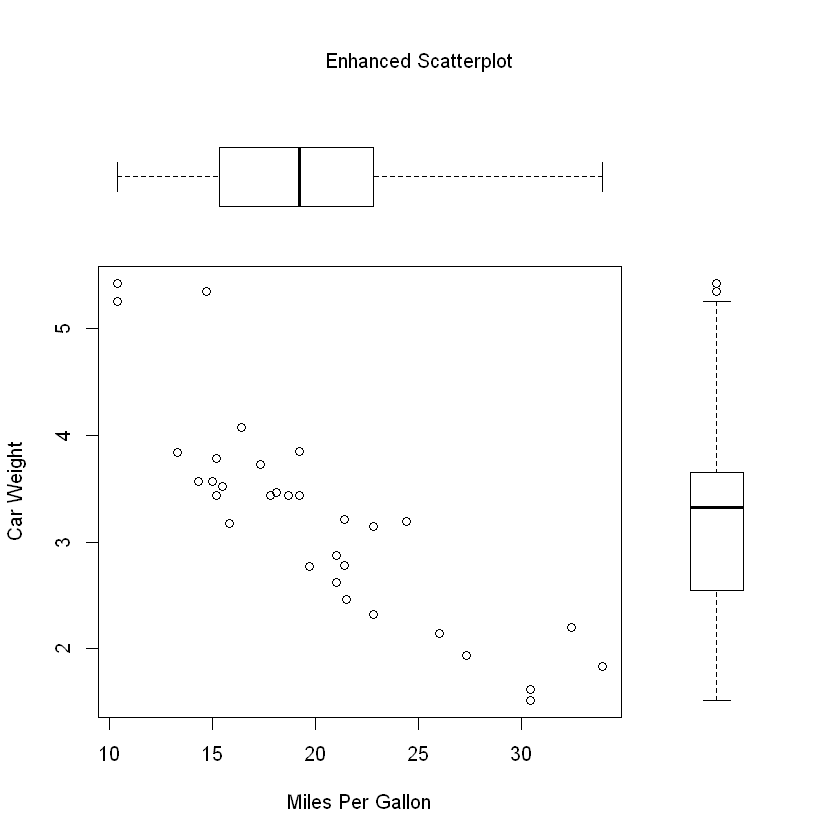

In [6]:
opar <- par(no.readonly=TRUE)
  par(fig=c(0, 0.8, 0, 0.8))
  plot(mtcars$mpg, mtcars$wt,
       xlab="Miles Per Gallon",
       ylab="Car Weight")
  par(fig=c(0, 0.8, 0.55, 1), new=TRUE)
  boxplot(mtcars$mpg, horizontal=TRUE, axes=FALSE)
  par(fig=c(0.65, 1, 0, 0.8), new=TRUE)
  boxplot(mtcars$wt, axes=FALSE)
  mtext("Enhanced Scatterplot", side=3, outer=TRUE, line=-3)
  par(opar)